In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import random_split, DataLoader
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

import numpy as np

# Download CIFAR 10 data form torchvision

In [2]:

train_dataset = torchvision.datasets.CIFAR10('~/datasets/cifar', train=True, download=True)
test_dataset = torchvision.datasets.CIFAR10('~/datasets/cifar', train=False, download=True)


Files already downloaded and verified
Files already downloaded and verified


# Image Contrasting

# Generate a list of contrast adjusted images

In [3]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torchvision.transforms.functional as F

contrast_factor = 2 #0.3 # 0 gray - 1 original image - 2 increases the contrast by a factor of 2.

def apply_contrast(images, contrast_factor):
    to_tensor = transforms.ToTensor()   
    images_list = [to_tensor(im) for im in images]
    images = torch.stack(images_list)
    contrast_adjusted_images = F.adjust_contrast(images, contrast_factor)
    return np.stack([transforms.ToPILImage()(im) for im in contrast_adjusted_images])

train_contrasted_images = apply_contrast(train_dataset.data, contrast_factor)
test_contrasted_images = apply_contrast(test_dataset.data, contrast_factor)

test_contrasted_images_0_4 = apply_contrast(test_dataset.data, 0.4)
test_contrasted_images_0_6 = apply_contrast(test_dataset.data, 0.6)
test_contrasted_images_2 = apply_contrast(test_dataset.data, 2)

print("Train contrast adjusted images shape")
print(train_contrasted_images.shape)

print("Test contrast adjusted images shape")
print(test_contrasted_images.shape)



Train contrast adjusted images shape
(50000, 32, 32, 3)
Test contrast adjusted images shape
(10000, 32, 32, 3)


# Visualizing generated contrast adjusted images: contrast factor 0.4

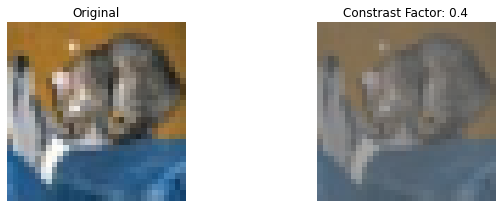

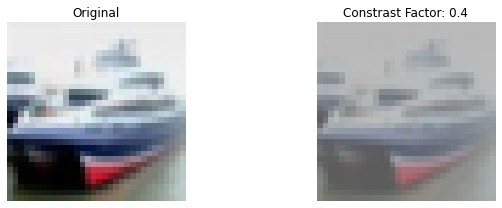

In [4]:
contrast_factor = 0.4
i=0
for constrasted_image in test_contrasted_images_0_4:
    fig = plt.figure(figsize=(10, 3))
    ax1,ax2 = fig.subplots(1,2)
    ax1.imshow(test_dataset.data[i], cmap='gray')
    ax1.set_axis_off()
    ax1.set_title("Original")
    ax2.imshow(constrasted_image, cmap='gray')
    ax2.set_axis_off()
    ax2.set_title("Constrast Factor: "+str(contrast_factor))
    fig.set_tight_layout(True)
    plt.show()
    i +=1
    
    if i==2:
        break
    

# Visualizing generated contrast adjusted images: contrast factor 0.6

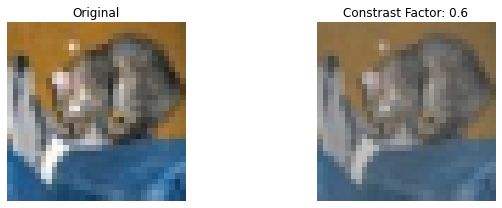

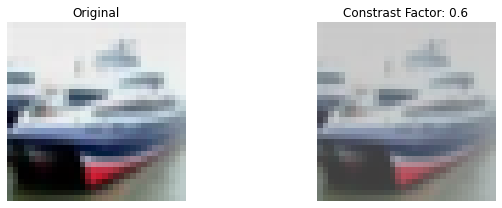

In [5]:
contrast_factor = 0.6
i=0
for constrasted_image in test_contrasted_images_0_6:
    fig = plt.figure(figsize=(10, 3))
    ax1,ax2 = fig.subplots(1,2)
    ax1.imshow(test_dataset.data[i], cmap='gray')
    ax1.set_axis_off()
    ax1.set_title("Original")
    ax2.imshow(constrasted_image, cmap='gray')
    ax2.set_axis_off()
    ax2.set_title("Constrast Factor: "+str(contrast_factor))
    fig.set_tight_layout(True)
    plt.show()
    i +=1
    
    if i==2:
        break

        
        
        

# Visualizing generated contrast adjusted images: contrast factor 2

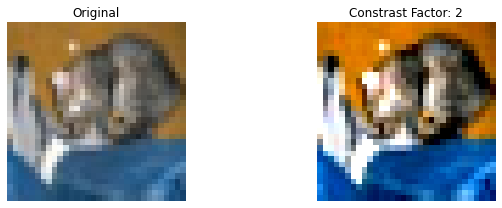

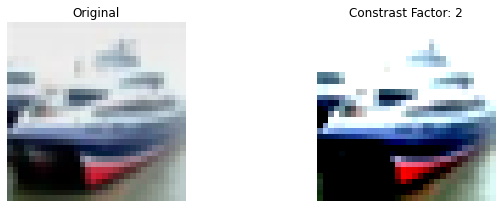

In [6]:
contrast_factor = 2
i=0
for constrasted_image in test_contrasted_images_2:
    fig = plt.figure(figsize=(10, 3))
    ax1,ax2 = fig.subplots(1,2)
    ax1.imshow(test_dataset.data[i], cmap='gray')
    ax1.set_axis_off()
    ax1.set_title("Original")
    ax2.imshow(constrasted_image, cmap='gray')
    ax2.set_axis_off()
    ax2.set_title("Constrast Factor: "+str(contrast_factor))
    fig.set_tight_layout(True)
    plt.show()
    i +=1
    
    if i==2:
        break

# Combining original and contrasted images

In [7]:
original_image_labels = np.zeros(len(train_dataset.data))
contrasted_image_labels = np.ones(len(train_contrasted_images))

test_original_image_labels = np.zeros(len(test_dataset.data))
test_contrasted_image_labels = np.ones(len(test_contrasted_images))

train_original_and_contrasted_images = np.concatenate((train_dataset.data, train_contrasted_images), axis=0)
train_contrast_labels = np.concatenate((original_image_labels, contrasted_image_labels), axis=None)
train_image_labels = np.concatenate((train_dataset.targets, train_dataset.targets), axis=None)

test_original_and_contrasted_images = np.concatenate((test_dataset.data, test_contrasted_images), axis=0)
test_contrast_labels = np.concatenate((test_original_image_labels, test_contrasted_image_labels), axis=None)

# test_contrasted_images_0_1 = apply_contrast(test_dataset.data, 0.1)
# test_contrasted_images_0_5 = apply_contrast(test_dataset.data, 0.5)
# test_contrasted_images_2 = apply_contrast(test_dataset.data, 2)

# combining the 4 different contrasts of images into one set
original_and_3_diff_contrasts_of_images = np.concatenate((test_dataset.data, test_contrasted_images_0_4,
                                                          test_contrasted_images_0_6,test_contrasted_images_2), axis=0)

print("Combined contrasted and original train images shape")
print(train_original_and_contrasted_images.shape)

print("Combined 4 different contrasts of images shape")
print(original_and_3_diff_contrasts_of_images.shape)


Combined contrasted and original train images shape
(100000, 32, 32, 3)
Combined 4 different contrasts of images shape
(40000, 32, 32, 3)


# Extract image features

In [8]:
from image_feature_extractor import Img2Vec

img2vec = Img2Vec()

Z = img2vec.get_vec(train_original_and_contrasted_images)

Z_4 = img2vec.get_vec(original_and_3_diff_contrasts_of_images)

Z_test = img2vec.get_vec(test_original_and_contrasted_images)

# Z_test_original = img2vec.get_vec(test_dataset.data)

# Z_test_contrasted = img2vec.get_vec(test_contrasted_images)


print("Shape of extracted features for combined contrasted and original images")
print(Z.shape)

# print("Shape of extracted features for original test images")
# print(Z_test_original.shape)

# print("Shape of extracted features for contrasted test images")
# print(Z_test_contrasted.shape)

print("Shape of extracted features for combined 4 different contrasts of images")
print(Z_4.shape)


Shape of extracted features for combined contrasted and original images
(100000, 512)
Shape of extracted features for combined 4 different contrasts of images
(40000, 512)


# Obtaining contrast prediction coefficients and prediction accuracy.

In [9]:
# Using sklearn Logistic Regression
from sklearn.linear_model import LogisticRegression


lr_model = LogisticRegression(random_state=0).fit(Z, train_contrast_labels)

contrast_coefficients = lr_model.coef_.reshape(-1,1)
contrast_coefficients = contrast_coefficients / np.linalg.norm(contrast_coefficients)

print("Contrast coefficients shape")
print(contrast_coefficients.shape)

print('Contrast prediction accuracy on training data: ', lr_model.score(Z, train_contrast_labels))

print('Contrast prediction accuracy on test data-rotaed and original combined: ', lr_model.score(Z_test, test_contrast_labels))

    


/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Contrast coefficients shape
(512, 1)
Contrast prediction accuracy on training data:  0.94144
Contrast prediction accuracy on test data-rotaed and original combined:  0.93935


# Find L, get F_4 features, plot groups of images that are most similar to each other (determined by calculating distances of features in F_4 after removing the column that corresponds to contrast)

Results for lamda  10

Distances for image at index  2116
Sorted distance indeces - contrast column removed 
[ 2116 22116 29227 12116  3670 23670]
Sorted distances - contrast column removed
[0.         5.1151375  7.15867648 7.23466269 7.60360641 7.66327853]
Images closest to image at index  2116
**************** Contrast features removed ************************************************ 


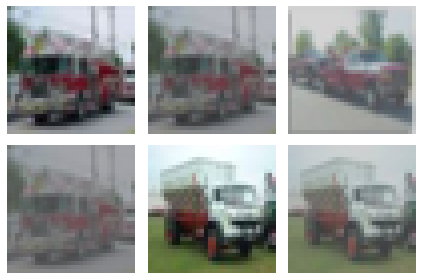

**************** All features in F_4 including contrast features********************************* 
Sorted distance indeces - all features in F_4
[ 2116 22116 29227 12116  3670 23670]
Sorted distances - all features in F_4
[0.         5.18946636 7.21097461 7.28335638 7.63242412 7.68059684]
Images closest to image at index  2116


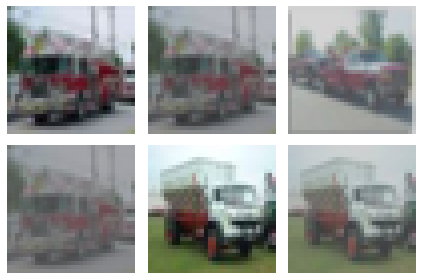

**************** All features in Z_4 (features from resnet)********************************* 
Sorted distance indeces - Z_4
[ 2116 22116 12116  3670 23670 25608]
Sorted distances - Z_4
[0.         6.36439    8.90480722 9.34677449 9.47497383 9.82420544]
Images closest to image at index  2116


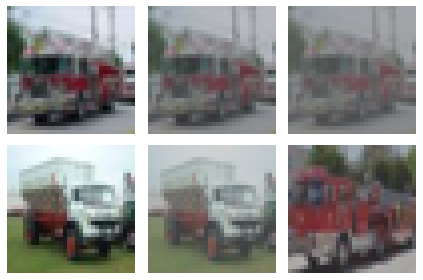





Distances for image at index  3169
Sorted distance indeces - contrast column removed 
[ 3169 23169  6724 33169 26724 13169]
Sorted distances - contrast column removed
[0.         5.82918971 6.58420906 7.22776379 8.14183623 9.46364944]
Images closest to image at index  3169
**************** Contrast features removed ************************************************ 


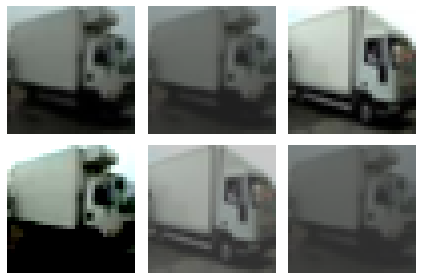

**************** All features in F_4 including contrast features********************************* 
Sorted distance indeces - all features in F_4
[ 3169 23169  6724 33169 26724 13169]
Sorted distances - all features in F_4
[0.         5.98442031 6.58734814 7.27517688 8.23886184 9.66090734]
Images closest to image at index  3169


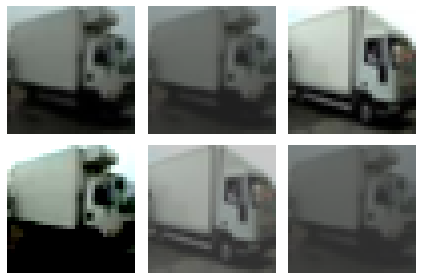

**************** All features in Z_4 (features from resnet)********************************* 
Sorted distance indeces - Z_4
[ 3169  6724 23169 33169 26724  1844]
Sorted distances - Z_4
[ 0.          7.96948179  8.189526    9.47507441 10.45447499 12.10852103]
Images closest to image at index  3169


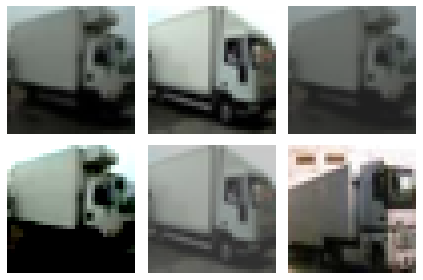





Distances for image at index  1594
Sorted distance indeces - contrast column removed 
[ 1594 21594 11594 10000 13796 19545]
Sorted distances - contrast column removed
[0.         4.72904708 7.27125375 8.41600435 8.51336078 8.53040014]
Images closest to image at index  1594
**************** Contrast features removed ************************************************ 


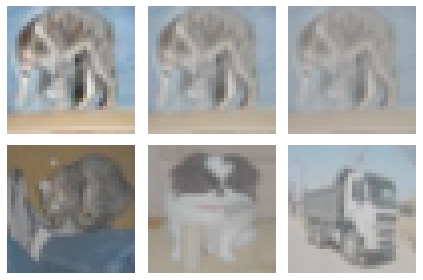

**************** All features in F_4 including contrast features********************************* 
Sorted distance indeces - all features in F_4
[ 1594 21594 11594 10000 13796 19545]
Sorted distances - all features in F_4
[0.         4.73814739 7.28314407 8.42126257 8.51336342 8.54738972]
Images closest to image at index  1594


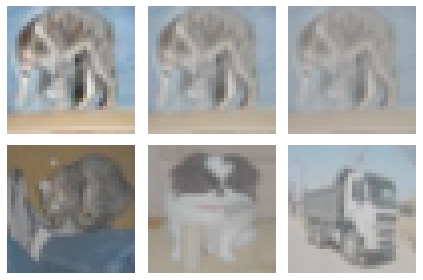

**************** All features in Z_4 (features from resnet)********************************* 
Sorted distance indeces - Z_4
[ 1594 21594 11594 13796 14963 11936]
Sorted distances - Z_4
[ 0.          6.45083902  9.66960367 11.1377435  11.17501729 11.56725896]
Images closest to image at index  1594


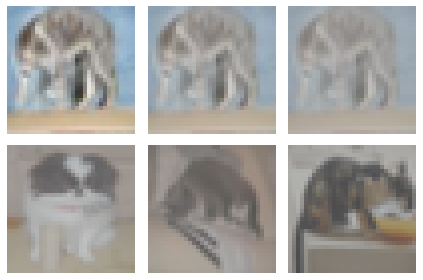





Distances for image at index  1479
Sorted distance indeces - contrast column removed 
[ 1479 21479 33997  6025  7882  9738]
Sorted distances - contrast column removed
[0.         7.13611128 8.01151458 8.25944448 8.4405311  8.5137853 ]
Images closest to image at index  1479
**************** Contrast features removed ************************************************ 


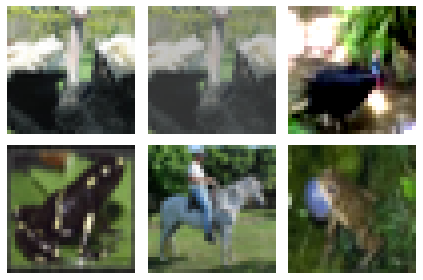

**************** All features in F_4 including contrast features********************************* 
Sorted distance indeces - all features in F_4
[ 1479 21479 33997  6025  7882  9738]
Sorted distances - all features in F_4
[0.         7.32128562 8.0644294  8.27283373 8.4408256  8.52339935]
Images closest to image at index  1479


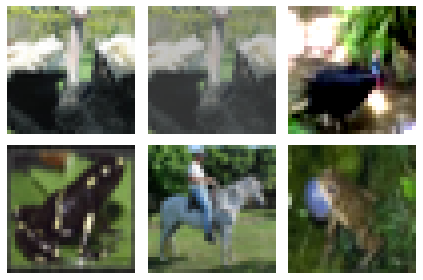

**************** All features in Z_4 (features from resnet)********************************* 
Sorted distance indeces - Z_4
[ 1479 21479  3997 33997  6025  3639]
Sorted distances - Z_4
[ 0.          9.07921389 10.83744084 11.08679821 11.11787165 11.22924894]
Images closest to image at index  1479


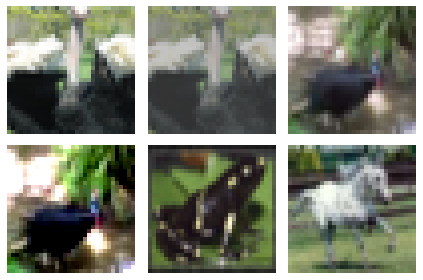





Distances for image at index  3654
Sorted distance indeces - contrast column removed 
[ 3654 33654 23654 32817 34768 30400]
Sorted distances - contrast column removed
[ 0.          7.67811415  8.3105615  10.37453853 10.60143235 10.86394947]
Images closest to image at index  3654
**************** Contrast features removed ************************************************ 


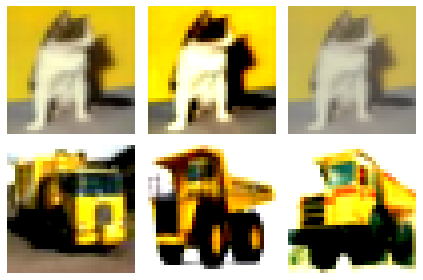

**************** All features in F_4 including contrast features********************************* 
Sorted distance indeces - all features in F_4
[ 3654 33654 23654 32817 34768 30400]
Sorted distances - all features in F_4
[ 0.          7.81916243  8.38405688 10.42987431 10.75214672 10.95768826]
Images closest to image at index  3654


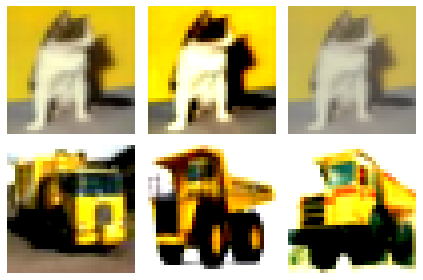

**************** All features in Z_4 (features from resnet)********************************* 
Sorted distance indeces - Z_4
[ 3654 33654 23654 32817 30400 31582]
Sorted distances - Z_4
[ 0.          9.82345582 12.59495121 14.62191669 14.85575596 15.57828147]
Images closest to image at index  3654


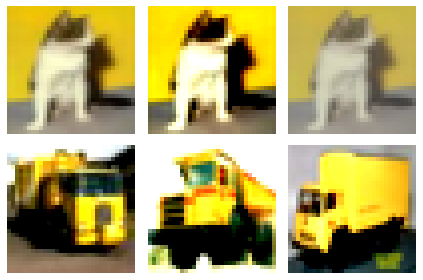












Results for lamda  100

Distances for image at index  3796
Sorted distance indeces - contrast column removed 
[ 3796 23796 33796  1924 22850  5853]
Sorted distances - contrast column removed
[0.         5.74767082 5.82053859 8.25816257 8.34880534 8.37737193]
Images closest to image at index  3796
**************** Contrast features removed ************************************************ 


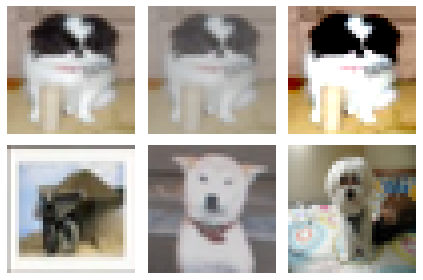

**************** All features in F_4 including contrast features********************************* 
Sorted distance indeces - all features in F_4
[ 3796 23796 33796  1924  5853 22850]
Sorted distances - all features in F_4
[0.         5.86654742 6.07023356 8.25864864 8.37776118 8.47542079]
Images closest to image at index  3796


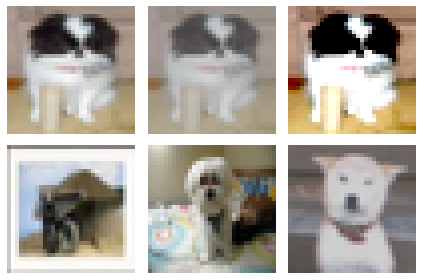

**************** All features in Z_4 (features from resnet)********************************* 
Sorted distance indeces - Z_4
[ 3796 23796 33796 31543 35986  1924]
Sorted distances - Z_4
[ 0.         10.58958399 11.06422419 14.52297955 14.69028438 14.75854266]
Images closest to image at index  3796


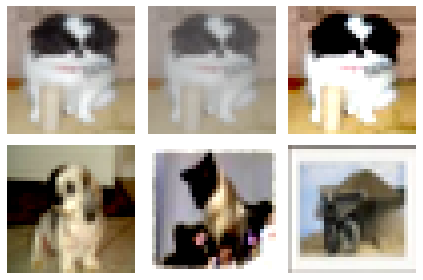





Distances for image at index  348
Sorted distance indeces - contrast column removed 
[  348 20348 30348 10348 25598  7793]
Sorted distances - contrast column removed
[ 0.          6.09299061  6.8007781   9.69147042 10.00155864 10.21019851]
Images closest to image at index  348
**************** Contrast features removed ************************************************ 


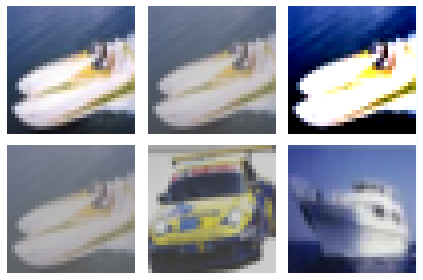

**************** All features in F_4 including contrast features********************************* 
Sorted distance indeces - all features in F_4
[  348 20348 30348 10348 25598  7793]
Sorted distances - all features in F_4
[ 0.          6.15457332  7.21888281  9.77466799 10.01358702 10.2225943 ]
Images closest to image at index  348


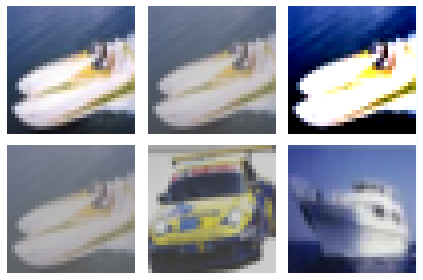

**************** All features in Z_4 (features from resnet)********************************* 
Sorted distance indeces - Z_4
[  348 20348 30348 25598  5598 10348]
Sorted distances - Z_4
[ 0.         10.55042688 13.19285159 17.24951792 17.36290998 17.81809797]
Images closest to image at index  348


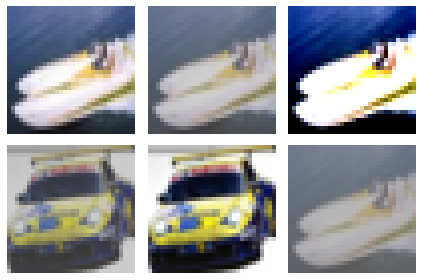





Distances for image at index  72
Sorted distance indeces - contrast column removed 
[   72 20072 30072 12614 19914 24014]
Sorted distances - contrast column removed
[0.         4.41353831 5.05483545 6.65955987 6.75639452 6.78062714]
Images closest to image at index  72
**************** Contrast features removed ************************************************ 


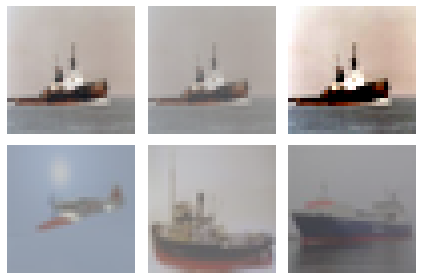

**************** All features in F_4 including contrast features********************************* 
Sorted distance indeces - all features in F_4
[   72 20072 30072 12614 19914 24014]
Sorted distances - all features in F_4
[0.         4.43146938 5.12389694 6.68125697 6.8057017  6.83016284]
Images closest to image at index  72


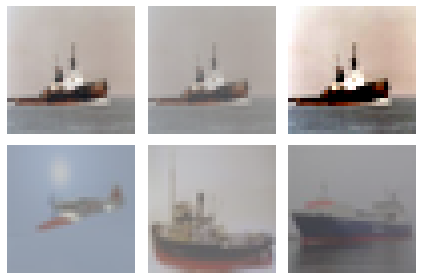

**************** All features in Z_4 (features from resnet)********************************* 
Sorted distance indeces - Z_4
[   72 20072 30072 23114 24014  7296]
Sorted distances - Z_4
[ 0.          6.94397606  8.26556004  9.99170079 10.53659752 10.58790747]
Images closest to image at index  72


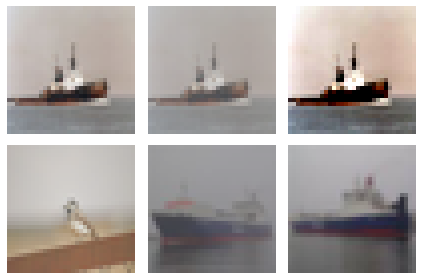





Distances for image at index  2423
Sorted distance indeces - contrast column removed 
[ 2423 22423 32423 12423 15290 20135]
Sorted distances - contrast column removed
[0.         4.19934267 6.72201627 6.75376381 7.51076848 7.65949662]
Images closest to image at index  2423
**************** Contrast features removed ************************************************ 


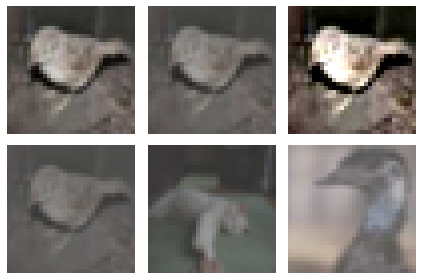

**************** All features in F_4 including contrast features********************************* 
Sorted distance indeces - all features in F_4
[ 2423 22423 32423 12423 15290 20135]
Sorted distances - all features in F_4
[0.         4.24582754 6.77978801 6.82772674 7.6463842  7.73612761]
Images closest to image at index  2423


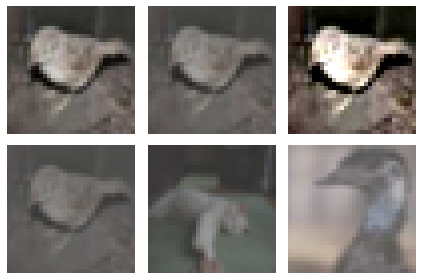

**************** All features in Z_4 (features from resnet)********************************* 
Sorted distance indeces - Z_4
[ 2423 22423 32423 12423 13477 25023]
Sorted distances - Z_4
[ 0.          5.97571161  9.87371759 10.01376239 10.91172289 10.94877863]
Images closest to image at index  2423


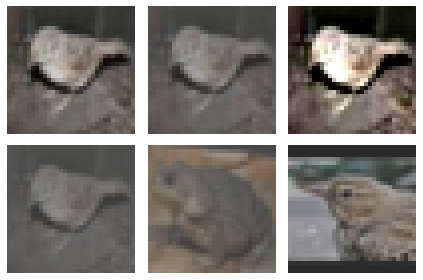





Distances for image at index  2281
Sorted distance indeces - contrast column removed 
[ 2281 22281 32281 12281 23557  6846]
Sorted distances - contrast column removed
[0.         4.16933964 5.73394164 6.27512849 6.66940289 6.72024355]
Images closest to image at index  2281
**************** Contrast features removed ************************************************ 


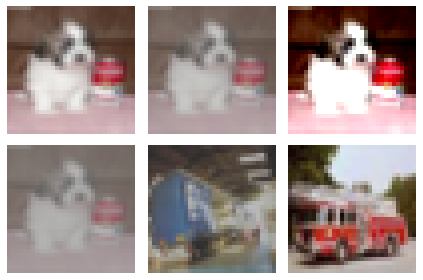

**************** All features in F_4 including contrast features********************************* 
Sorted distance indeces - all features in F_4
[ 2281 22281 32281 12281 23557  6846]
Sorted distances - all features in F_4
[0.         4.18309735 6.0517266  6.28931722 6.67470578 6.73170987]
Images closest to image at index  2281


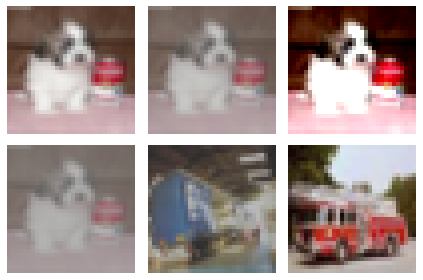

**************** All features in Z_4 (features from resnet)********************************* 
Sorted distance indeces - Z_4
[ 2281 22281 12281 24755 16871 27470]
Sorted distances - Z_4
[ 0.          6.88859986 10.38184717 10.60844279 11.4587584  11.45897262]
Images closest to image at index  2281


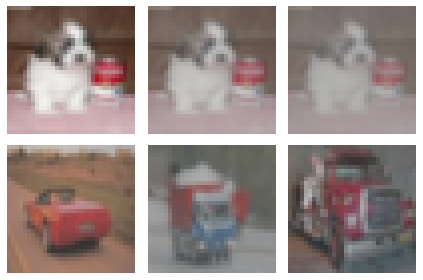












Results for lamda  1000

Distances for image at index  2448
Sorted distance indeces - contrast column removed 
[ 2448 13442 33054 38424 20105 24143]
Sorted distances - contrast column removed
[  0.         218.92276733 284.04052595 300.25141387 328.89080147
 382.94104422]
Images closest to image at index  2448
**************** Contrast features removed ************************************************ 


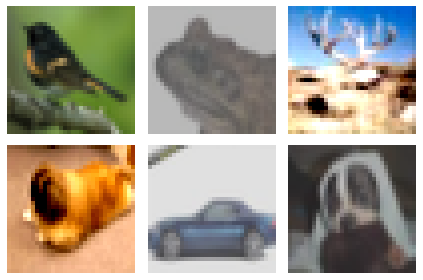

**************** All features in F_4 including contrast features********************************* 
Sorted distance indeces - all features in F_4
[ 2448 13442 33054 38424 20105 24143]
Sorted distances - all features in F_4
[  0.         310.5620849  403.05791355 423.18817333 464.81730776
 542.10312244]
Images closest to image at index  2448


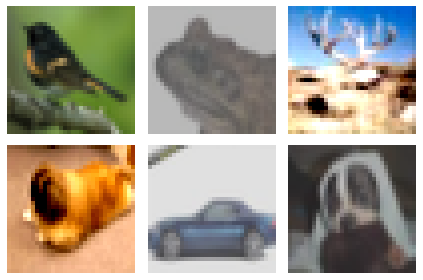

**************** All features in Z_4 (features from resnet)********************************* 
Sorted distance indeces - Z_4
[ 2448 22448 32448  3725 12448  6065]
Sorted distances - Z_4
[ 0.         10.2921649  10.88048224 15.08772608 15.20040492 15.20430075]
Images closest to image at index  2448


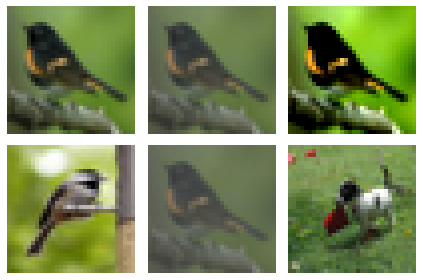





Distances for image at index  363
Sorted distance indeces - contrast column removed 
[  363 16423 13098 26549  4734 31726]
Sorted distances - contrast column removed
[  0.          59.37046172 113.8012129  198.16042008 206.46106224
 208.13258677]
Images closest to image at index  363
**************** Contrast features removed ************************************************ 


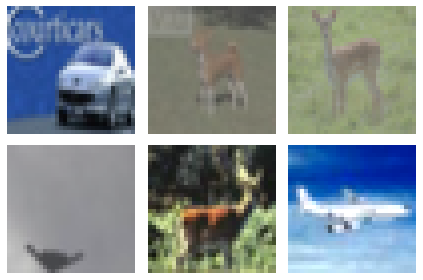

**************** All features in F_4 including contrast features********************************* 
Sorted distance indeces - all features in F_4
[  363 16423 13098 26549  4734 31726]
Sorted distances - all features in F_4
[  0.          82.61918116 160.1509327  279.50399912 291.95789491
 294.93475726]
Images closest to image at index  363


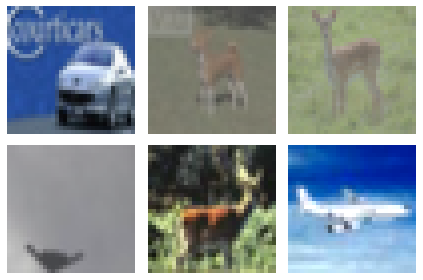

**************** All features in Z_4 (features from resnet)********************************* 
Sorted distance indeces - Z_4
[  363 20363 10363 30363  9611 29611]
Sorted distances - Z_4
[ 0.          8.01223629 11.2064283  11.212549   12.13354993 12.33032625]
Images closest to image at index  363


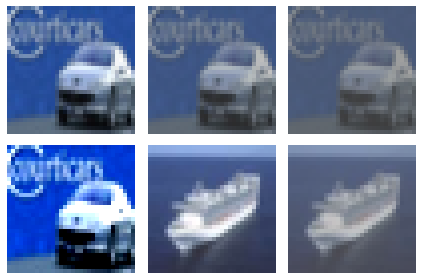





Distances for image at index  1369
Sorted distance indeces - contrast column removed 
[ 1369 37145 33100 23119 37387  3707]
Sorted distances - contrast column removed
[  0.          70.58590438  76.50124088  96.51327651 467.84705212
 539.44167558]
Images closest to image at index  1369
**************** Contrast features removed ************************************************ 


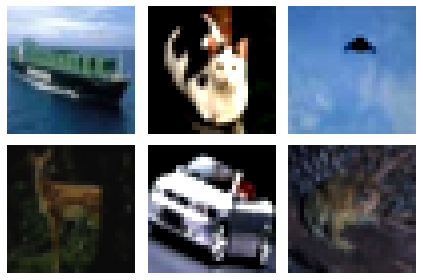

**************** All features in F_4 including contrast features********************************* 
Sorted distance indeces - all features in F_4
[ 1369 37145 33100 23119 37387  3707]
Sorted distances - all features in F_4
[  0.          99.88445562 107.69157549 135.04162516 660.96446961
 764.23656232]
Images closest to image at index  1369


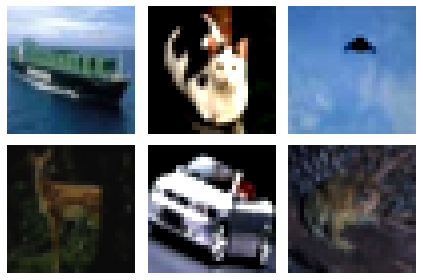

**************** All features in Z_4 (features from resnet)********************************* 
Sorted distance indeces - Z_4
[ 1369 21369  8294  5500  6468 11369]
Sorted distances - Z_4
[ 0.          9.88773478 12.9644532  13.99233299 14.04360328 14.16573256]
Images closest to image at index  1369


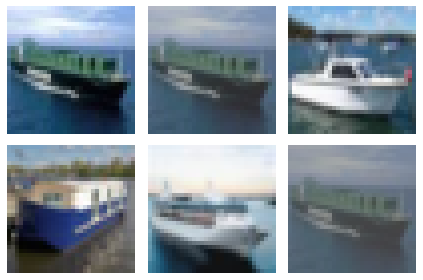





Distances for image at index  1838
Sorted distance indeces - contrast column removed 
[ 1838 16106 29744 10069   130 12933]
Sorted distances - contrast column removed
[  0.         136.59991301 156.38353526 235.47318883 349.06966736
 411.3077582 ]
Images closest to image at index  1838
**************** Contrast features removed ************************************************ 


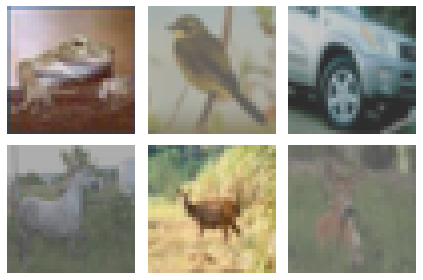

**************** All features in F_4 including contrast features********************************* 
Sorted distance indeces - all features in F_4
[ 1838 16106 29744 10069   130 12933]
Sorted distances - all features in F_4
[  0.         193.61600514 220.08057553 333.5617442  493.95192685
 582.41124488]
Images closest to image at index  1838


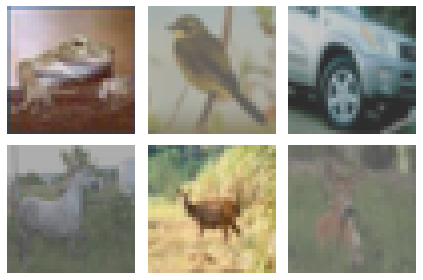

**************** All features in Z_4 (features from resnet)********************************* 
Sorted distance indeces - Z_4
[ 1838 21838 31838 11838 25862 18071]
Sorted distances - Z_4
[ 0.          7.39185466 10.60660158 10.76538639 11.39259512 11.7327131 ]
Images closest to image at index  1838


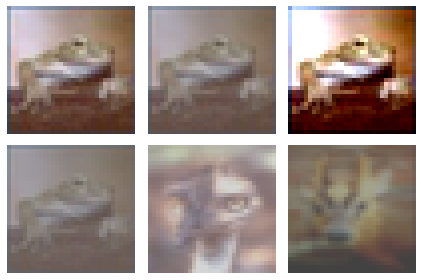





Distances for image at index  203
Sorted distance indeces - contrast column removed 
[  203 24575 14389 29329 18763 24386]
Sorted distances - contrast column removed
[  0.          20.8903208  226.52922816 229.57245199 281.63038391
 327.63825214]
Images closest to image at index  203
**************** Contrast features removed ************************************************ 


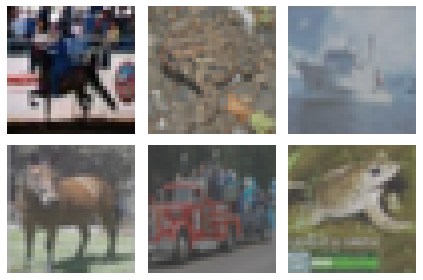

**************** All features in F_4 including contrast features********************************* 
Sorted distance indeces - all features in F_4
[  203 24575 14389 29329 18763 24386]
Sorted distances - all features in F_4
[  0.          28.23736675 319.28013663 323.77868952 398.90832142
 463.63049934]
Images closest to image at index  203


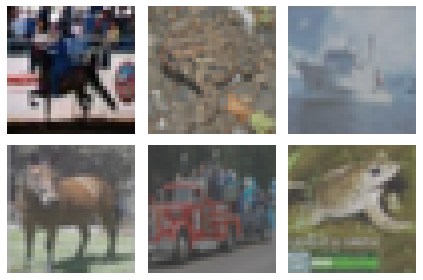

**************** All features in Z_4 (features from resnet)********************************* 
Sorted distance indeces - Z_4
[  203 20203  6356 28107 30203 23121]
Sorted distances - Z_4
[ 0.          8.68278083  9.92607469 10.70614304 11.08632785 11.12685818]
Images closest to image at index  203


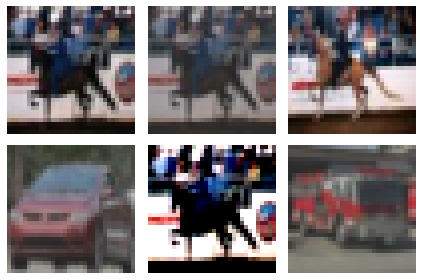

In [10]:
import pandas as pd
from scipy import stats
from scipy.spatial import distance
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.pyplot as plt

# Computing M
lamdas = [10,100,1000]

for lamda in lamdas:
    print("Results for lamda ", lamda)
    print()
    k = 400 #int(Z.shape[1]*0.05) # % of original number of features
    n = Z.shape[0]
    delta_Z_matrix = np.absolute((Z[:int(len(train_contrast_labels)/2),:] - Z[int(len(train_contrast_labels)/2):,:]))
    M = - Z.T @ Z/n + lamda * delta_Z_matrix.T @ delta_Z_matrix / (n // 2 ) 


    # Computing the term on which we perform SVD
    alpha_alpha_T = contrast_coefficients @ contrast_coefficients.T
    d = alpha_alpha_T.shape[0]
    I = np.identity(d)
    I_minus_alpa_alpha_T = I-alpha_alpha_T
    term_for_SVD = (I_minus_alpa_alpha_T @ M) @ I_minus_alpa_alpha_T


    # Performing SVD to get eigenvectors and eigenvalues
    from numpy import linalg as LA
    eigenvalues, eigenvectors = LA.eigh(term_for_SVD)

    # Forming L from eigenvectors and alpha
    L_1 = contrast_coefficients
    least_k_eigen_values = eigenvalues[:k]
    least_k_eigen_values[np.absolute(least_k_eigen_values)<0.000001]=0

    non_zero_indeces = None
    if 0 in least_k_eigen_values:
        non_zero_indeces = np.nonzero(least_k_eigen_values)[0]
        least_k_eigen_values_without_0 = least_k_eigen_values[non_zero_indeces]

    else:
        non_zero_indeces = np.nonzero(least_k_eigen_values[:k-1])[0]
        least_k_eigen_values_without_0 = least_k_eigen_values[:k-1]

    L_2 = eigenvectors[:,non_zero_indeces]

    L = np.concatenate((L_1, L_2), axis=1)
    
    
    
    
    
    
   
    # Obtaining F_test values from extracted image features using numpy's linalg.lstsq function.
    F_4 = torch.from_numpy(np.linalg.lstsq(L, Z_4.transpose(), rcond=None)[0].transpose())
    F_4_first_col_removed = F_4[:,1:].detach().numpy() 
    all_F_4 = F_4.detach().numpy()   
    
    for i in np.random.randint(0, 3999, size=5):
        # Calculating the distance between image at index i and all the other images. Distance is calculated 
        # using features in F
        print("Distances for image at index ", i)
        distances = distance.cdist(F_4_first_col_removed, F_4_first_col_removed[i].reshape(1,-1), 'euclidean').flatten()
        sorted_distance_indeces1 = np.argsort(distances) 
        print("Sorted distance indeces - contrast column removed ")
        print(sorted_distance_indeces1[:6])
        print("Sorted distances - contrast column removed")
        print(distances[sorted_distance_indeces1[:6]])
        
        # Plotting first six images closest (distance-wise) to image at index i
        print("Images closest to image at index ", i)
        # Plots for features in F_4 after removing contrast features
        print("**************** Contrast features removed ************************************************ ")
        fig, axs = plt.subplots(2, 3, sharex=True, sharey=True)
        axs[0,0].imshow(original_and_3_diff_contrasts_of_images[sorted_distance_indeces1[0]], cmap='gray')
        axs[0,0].set_axis_off()
        axs[0,1].imshow(original_and_3_diff_contrasts_of_images[sorted_distance_indeces1[1]], cmap='gray')
        axs[0,1].set_axis_off()
        axs[0,2].imshow(original_and_3_diff_contrasts_of_images[sorted_distance_indeces1[2]], cmap='gray')
        axs[0,2].set_axis_off()
        axs[1,0].imshow(original_and_3_diff_contrasts_of_images[sorted_distance_indeces1[3]], cmap='gray')
        axs[1,0].set_axis_off()
        axs[1,1].imshow(original_and_3_diff_contrasts_of_images[sorted_distance_indeces1[4]], cmap='gray')
        axs[1,1].set_axis_off()
        axs[1,2].imshow(original_and_3_diff_contrasts_of_images[sorted_distance_indeces1[5]], cmap='gray')
        axs[1,2].set_axis_off()
        fig.set_tight_layout(True)
        plt.show()
        
        # Plots for all features in F_4 including contrast features 
        print("**************** All features in F_4 including contrast features********************************* ")
#         print("Distances for image at index ", i)
        distances2 = distance.cdist(all_F_4, all_F_4[i].reshape(1,-1), 'euclidean').flatten()
        sorted_distance_indeces2 = np.argsort(distances2) 
        print("Sorted distance indeces - all features in F_4")
        print(sorted_distance_indeces2[:6])
        print("Sorted distances - all features in F_4")
        print(distances2[sorted_distance_indeces2[:6]])

        # Plotting first six images closest (distance-wise) to image at index i
        print("Images closest to image at index ", i)
        fig, axs = plt.subplots(2, 3, sharex=True, sharey=True)
        axs[0,0].imshow(original_and_3_diff_contrasts_of_images[sorted_distance_indeces2[0]], cmap='gray')
        axs[0,0].set_axis_off()
        axs[0,1].imshow(original_and_3_diff_contrasts_of_images[sorted_distance_indeces2[1]], cmap='gray')
        axs[0,1].set_axis_off()
        axs[0,2].imshow(original_and_3_diff_contrasts_of_images[sorted_distance_indeces2[2]], cmap='gray')
        axs[0,2].set_axis_off()
        axs[1,0].imshow(original_and_3_diff_contrasts_of_images[sorted_distance_indeces2[3]], cmap='gray')
        axs[1,0].set_axis_off()
        axs[1,1].imshow(original_and_3_diff_contrasts_of_images[sorted_distance_indeces2[4]], cmap='gray')
        axs[1,1].set_axis_off()
        axs[1,2].imshow(original_and_3_diff_contrasts_of_images[sorted_distance_indeces2[5]], cmap='gray')
        axs[1,2].set_axis_off()
        fig.set_tight_layout(True)
        plt.show()
        
        # Plots for all features in Z_4 including contrast features 
        print("**************** All features in Z_4 (features from resnet)********************************* ")
#         print("Distances for image at index ", i)
        distances3 = distance.cdist(Z_4, Z_4[i].reshape(1,-1), 'euclidean').flatten()
        sorted_distance_indeces3 = np.argsort(distances3) 
        print("Sorted distance indeces - Z_4")
        print(sorted_distance_indeces3[:6])
        print("Sorted distances - Z_4")
        print(distances3[sorted_distance_indeces3[:6]])

        # Plotting first six images closest (distance-wise) to image at index i
        print("Images closest to image at index ", i)
        fig, axs = plt.subplots(2, 3, sharex=True, sharey=True)
        axs[0,0].imshow(original_and_3_diff_contrasts_of_images[sorted_distance_indeces3[0]], cmap='gray')
        axs[0,0].set_axis_off()
        axs[0,1].imshow(original_and_3_diff_contrasts_of_images[sorted_distance_indeces3[1]], cmap='gray')
        axs[0,1].set_axis_off()
        axs[0,2].imshow(original_and_3_diff_contrasts_of_images[sorted_distance_indeces3[2]], cmap='gray')
        axs[0,2].set_axis_off()
        axs[1,0].imshow(original_and_3_diff_contrasts_of_images[sorted_distance_indeces3[3]], cmap='gray')
        axs[1,0].set_axis_off()
        axs[1,1].imshow(original_and_3_diff_contrasts_of_images[sorted_distance_indeces3[4]], cmap='gray')
        axs[1,1].set_axis_off()
        axs[1,2].imshow(original_and_3_diff_contrasts_of_images[sorted_distance_indeces3[5]], cmap='gray')
        axs[1,2].set_axis_off()
        fig.set_tight_layout(True)
        plt.show()
        
        print("\n"*3)

    print("\n"*6)
#     break